# Image Similarity using Convolution Autoencoders and KNN

### AutoEncoder

In autoencoders then input and output is the same. Basically the input is compressed and the features are learnt, after which the model tries to reconstruct the image

### CNN based Image similarity

A convolution is used in NN because rather than just flattening the image which causes loss of data, we do a convolution which compresses the data (image) without much loss of information. And then the flattened image is passed through a neural network. and based on cosine similarity and nearest neighbours, we identify similary images for an input image

### Convolution Autoencoders

Since the autoencoders learn the informaed of the compressed images, and it a form of neural network which tries to recreate the compressed image (input same as output). If we add a convolution to is, the image information is not lost. After which we can use KNN to find the most similar image to an input image

## Importing Libraries

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import imageio as io
from tqdm.notebook import tqdm
# sklearn

from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#For model performance
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.externals import joblib
#For model training
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image

In [2]:
## Accessing the images datasets

img_folder = r'/Users/bhanukiran/Desktop/kaedim cv/dataset/'

### Now that we have the images the first step in CAE is to flatten the images

In [12]:
file_path = os.listdir(img_folder)

In [14]:
print(len(file_path))

4738


In [16]:
# splitting into train and test data

train_files, test_files = train_test_split(file_path, test_size = 0.30)
train_files = pd.DataFrame(train_files,columns=['filepath'])
test_files = pd.DataFrame(test_files,columns=['filepath'])
#converting into .csv file for future reference.
train_files.to_csv('/Users/bhanukiran/Desktop/kaedim cv/train_file.csv')
test_files.to_csv('/Users/bhanukiran/Desktop/kaedim cv/test_file.csv')
#loading csv files. 
train_files = list(pd.read_csv('/Users/bhanukiran/Desktop/kaedim cv/train_file.csv')['filepath'])
test_files = list(pd.read_csv('/Users/bhanukiran/Desktop/kaedim cv/test_file.csv')['filepath'])

In [18]:
train_files

['1911.jpg',
 '3904.jpg',
 '91.jpg',
 '4032.jpg',
 '327.jpg',
 '2167.jpg',
 '3757.jpg',
 '3840.jpg',
 '3982.jpg',
 '1186.jpg',
 '2693.jpg',
 '2567.jpg',
 '1302.jpg',
 '4362.jpg',
 '2966.jpg',
 '747.jpg',
 '3447.jpg',
 '4380.jpg',
 '2368.jpg',
 '4015.jpg',
 '3565.jpg',
 '723.jpg',
 '2335.jpg',
 '3595.jpg',
 '1585.jpg',
 '1126.jpg',
 '4094.jpg',
 '3316.jpg',
 '848.jpg',
 '1554.jpg',
 '2021.jpg',
 '2018.jpg',
 '3734.jpg',
 '1002.jpg',
 '3921.jpg',
 '2976.jpg',
 '3215.jpg',
 '1843.jpg',
 '1927.jpg',
 '2178.jpg',
 '3060.jpg',
 '628.jpg',
 '1304.jpg',
 '3252.jpg',
 '944.jpg',
 '3942.jpg',
 '4218.jpg',
 '3709.jpg',
 '3722.jpg',
 '2045.jpg',
 '858.jpg',
 '438.jpg',
 '2814.jpg',
 '3494.jpg',
 '441.jpg',
 '4210.jpg',
 '2628.jpg',
 '3725.jpg',
 '2847.jpg',
 '3832.jpg',
 '2812.jpg',
 '2054.jpg',
 '2839.jpg',
 '4444.jpg',
 '796.jpg',
 '3704.jpg',
 '1032.jpg',
 '3112.jpg',
 '2490.jpg',
 '1150.jpg',
 '3297.jpg',
 '1307.jpg',
 '901.jpg',
 '3428.jpg',
 '1990.jpg',
 '2805.jpg',
 '2548.jpg',
 '2664.jpg',

In [19]:
test_files

['2974.jpg',
 '2457.jpg',
 '413.jpg',
 '1472.jpg',
 '3023.jpg',
 '3591.jpg',
 '2523.jpg',
 '1715.jpg',
 '2621.jpg',
 '2666.jpg',
 '3295.jpg',
 '2128.jpg',
 '112.jpg',
 '3491.jpg',
 '986.jpg',
 '1475.jpg',
 '2373.jpg',
 '1421.jpg',
 '2579.jpg',
 '2968.jpg',
 '1250.jpg',
 '3759.jpg',
 '3605.jpg',
 '1544.jpg',
 '1494.jpg',
 '3915.jpg',
 '4670.jpg',
 '221.jpg',
 '2608.jpg',
 '818.jpg',
 '3190.jpg',
 '2233.jpg',
 '4187.jpg',
 '2739.jpg',
 '4531.jpg',
 '1508.jpg',
 '444.jpg',
 '639.jpg',
 '2372.jpg',
 '3949.jpg',
 '799.jpg',
 '174.jpg',
 '2008.jpg',
 '826.jpg',
 '2111.jpg',
 '1850.jpg',
 '4013.jpg',
 '2818.jpg',
 '967.jpg',
 '3469.jpg',
 '147.jpg',
 '3646.jpg',
 '1826.jpg',
 '722.jpg',
 '151.jpg',
 '1957.jpg',
 '3437.jpg',
 '73.jpg',
 '1978.jpg',
 '1318.jpg',
 '2126.jpg',
 '3478.jpg',
 '3356.jpg',
 '310.jpg',
 '4188.jpg',
 '3255.jpg',
 '2092.jpg',
 '2904.jpg',
 '976.jpg',
 '3145.jpg',
 '3823.jpg',
 '159.jpg',
 '1473.jpg',
 '543.jpg',
 '2209.jpg',
 '2715.jpg',
 '460.jpg',
 '4633.jpg',
 '2177.

In [28]:
def preprocess_image(file_array):
    image_array = []
    for path in tqdm(file_array):
        img = cv2.imread('/Users/bhanukiran/Desktop/kaedim cv/dataset/'+path)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224,224))
        image_array.append(np.array(img))
    image_array = np.array(image_array)
    image_array = image_array.reshape(image_array.shape[0], 224, 224, 3) 
    image_array = image_array.astype('float32')
    image_array /= 255 
    return np.array(image_array)

In [29]:
train_data = preprocess_image(train_files)

  0%|          | 0/3316 [00:00<?, ?it/s]

In [30]:
test_data = preprocess_image(test_files)

  0%|          | 0/1422 [00:00<?, ?it/s]

In [31]:
def encoder_decoder_model():

    """
    Used to build Convolutional Autoencoder model architecture to get compressed image data which is easier to process.
    Returns:
    Auto encoder model
    """
    #Encoder 
    model = Sequential(name='Convolutional_AutoEncoder_Model')
    model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(224, 224, 3),padding='same', name='Encoding_Conv2D_1'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_1'))
    model.add(Conv2D(128, kernel_size=(3, 3),strides=1,kernel_regularizer = tf.keras.regularizers.L2(0.001),activation='relu',padding='same', name='Encoding_Conv2D_2'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.001), padding='same', name='Encoding_Conv2D_3'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same', name='Encoding_MaxPooling2D_3'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',kernel_regularizer= tf.keras.regularizers.L2(0.001), padding='same', name='Encoding_Conv2D_4'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=2,padding='valid', name='Encoding_MaxPooling2D_4'))
    model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same', name='Encoding_Conv2D_5'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
    
    #Decoder
    model.add(Conv2D(512, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001),activation='relu', padding='same', name='Decoding_Conv2D_1'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_1'))
    model.add(Conv2D(512, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001), activation='relu', padding='same', name='Decoding_Conv2D_2'))
    model.add(UpSampling2D((2, 2), name='Decoding_Upsamping2D_2'))
    model.add(Conv2D(256, kernel_size=(3, 3), kernel_regularizer = tf.keras.regularizers.L2(0.001), activation='relu', padding='same',name='Decoding_Conv2D_3'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_3'))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001), padding='same',name='Decoding_Conv2D_4'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_4'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.001), padding='same',name='Decoding_Conv2D_5'))
    model.add(UpSampling2D((2, 2),name='Decoding_Upsamping2D_5'))
    model.add(Conv2D(3, kernel_size=(3, 3), padding='same',activation='sigmoid',name='Decoding_Output'))
    return model

In [36]:
model = encoder_decoder_model()
model.summary()
print("\n")

Model: "Convolutional_AutoEncoder_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoding_Conv2D_1 (Conv2D)  (None, 224, 224, 64)      1792      
                                                                 
 Encoding_MaxPooling2D_1 (Ma  (None, 112, 112, 64)     0         
 xPooling2D)                                                     
                                                                 
 Encoding_Conv2D_2 (Conv2D)  (None, 112, 112, 128)     73856     
                                                                 
 Encoding_MaxPooling2D_2 (Ma  (None, 56, 56, 128)      0         
 xPooling2D)                                                     
                                                                 
 Encoding_Conv2D_3 (Conv2D)  (None, 56, 56, 256)       295168    
                                                                 
 Encoding_MaxPooling2D_3 (Ma  (None

In [46]:
optimizer = Adam(learning_rate=0.0001) 
model = encoder_decoder_model() 
model.compile(optimizer=optimizer, loss='mse') 
early_stopping = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=6,min_delta=0.0001) 
#checkpoint = ModelCheckpoint('/content/drive/My Drive/encoder_model.h5', monitor='val_loss', mode='min', save_best_only=True) 
model.fit(train_data, train_data, epochs=5, batch_size=32,validation_data=(test_data,test_data),callbacks=[early_stopping])   

Epoch 1/5
  4/104 [>.............................] - ETA: 14:26 - loss: 466.9286

KeyboardInterrupt: 

In [42]:
def plot_(x,y1,y2,row,col,ind,title,xlabel,ylabel,label,isimage=False,color='r'):

    """
    This function is used for plotting images and graphs (Visualization of end results of model training)
    Arguments:
    x - (np.ndarray or list) - an image array
    y1 - (list) - for plotting graph on left side.
    y2 - (list) - for plotting graph on right side.
    row - (int) - row number of subplot
    col - (int) - column number of subplot
    ind - (int) - index number of subplot
    title - (string) - title of the plot 
    xlabel - (list) - labels of x axis
    ylabel - (list) - labels of y axis
    label - (string) - for adding legend in the plot
    isimage - (boolean) - True in case of image else False
    color - (char) - color of the plot (prefered green for training and red for testing).
    """
    
    plt.subplot(row,col,ind)
    if isimage:
        plt.imshow(x)
        plt.title(title)
        plt.axis('off')
    else:
        plt.plot(y1,label=label,color='g'); plt.scatter(x,y1,color='g')
        if y2!='': plt.plot(y2,color=color,label='validation'); plt.scatter(x,y2,color=color)
        plt.grid()
        plt.legend()
        plt.title(title); plt.xlabel(xlabel); plt.ylabel(ylabel)

1/1 [==============================] - 1s 513ms/step


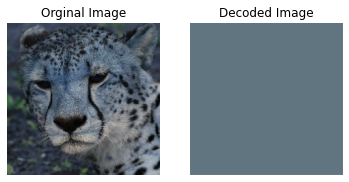

In [43]:
sample_image = train_data[7]
sample_image = np.expand_dims(sample_image,axis=0)
image = model.predict(sample_image)
plot_(sample_image[0,:,:,:],'','',1,2,1,"Orginal Image","","","",True)
plot_(image[0,:,:],'','',1,2,2,"Decoded Image","","","",True)
plt.show()

1/1 [==============================] - 0s 93ms/step


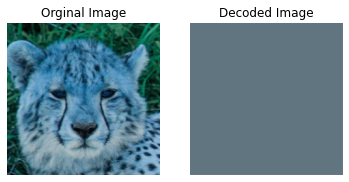

In [44]:
sample_image = train_data[2396]
sample_image = np.expand_dims(sample_image,axis=0)
image = model.predict(sample_image)
plot_(sample_image[0,:,:,:],'','',1,2,1,"Orginal Image","","","",True)
plot_(image[0,:,:],'','',1,2,2,"Decoded Image","","","",True)
plt.show()